In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
dataset = pd.read_csv("../data/raw/data.csv")
dataset.head()

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA


### Analisis Exploratorio

In [3]:
dataset.describe

<bound method NDFrame.describe of       mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro   ingreso  \
0        0     235  FAMILIAR    30      3748    93.0             5   3500.00   
1        0      18  FAMILIAR    32      4598     9.0            12    900.00   
2        0       0  FAMILIAR    26      5148     8.0             2   2400.00   
3        0       0  FAMILIAR    36      5179    20.0            12   2700.00   
4        0       0  FAMILIAR    46      3960     NaN             1   3100.00   
...    ...     ...       ...   ...       ...     ...           ...       ...   
8394     0       0    PROPIA    43      7917   106.0            12  13660.00   
8395     1       0  FAMILIAR    29      3352    25.0             0    813.00   
8396     0       0  FAMILIAR    32      6821    19.0            12   3000.00   
8397     1       0    PROPIA    38      3882     7.0            12   3069.23   
8398     0       0  FAMILIAR    36      5909    51.0            12   3500.00   

     

In [4]:
dataset.dtypes

mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
exp_sf          float64
nivel_ahorro      int64
ingreso         float64
linea_sf        float64
deuda_sf        float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object

In [5]:
dataset.isnull().mean()

mora            0.000000
atraso          0.000000
vivienda        0.000000
edad            0.000000
dias_lab        0.000000
exp_sf          0.217883
nivel_ahorro    0.000000
ingreso         0.000000
linea_sf        0.134183
deuda_sf        0.054887
score           0.000000
zona            0.000000
clasif_sbs      0.000000
nivel_educ      0.000000
dtype: float64

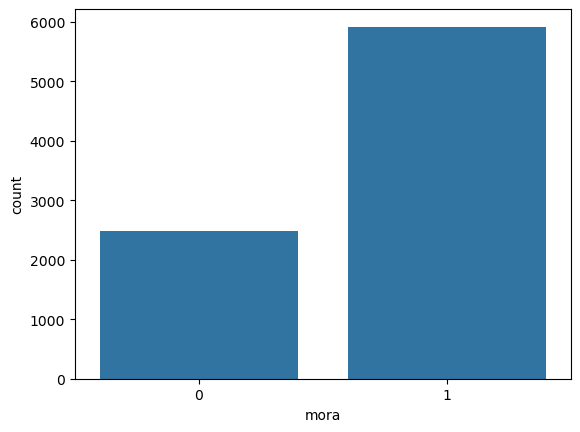

In [8]:
sns.countplot(x='mora', data=dataset)
plt.show()

In [10]:
# Definir las columnas numéricas y categóricas
num_features = ['edad', 'dias_lab', 'exp_sf', 'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score','clasif_sbs']
cat_features = ['vivienda', 'zona', 'nivel_educ']


In [11]:
num_imputer = SimpleImputer(strategy='mean')

dataset[num_features] = num_imputer.fit_transform(dataset[num_features])

### Ingeniería de características 

In [12]:
# Crear un codificador (LabelEncoder)
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
for col in cat_features:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Ver las primeras filas del dataset con las columnas codificadas
print(dataset.head())

   mora  atraso  vivienda  edad  dias_lab     exp_sf  nivel_ahorro  ingreso  \
0     0     235         1  30.0    3748.0  93.000000           5.0   3500.0   
1     0      18         1  32.0    4598.0   9.000000          12.0    900.0   
2     0       0         1  26.0    5148.0   8.000000           2.0   2400.0   
3     0       0         1  36.0    5179.0  20.000000          12.0   2700.0   
4     0       0         1  46.0    3960.0  32.401583           1.0   3100.0   

       linea_sf  deuda_sf  score  zona  clasif_sbs  nivel_educ  
0  11987.241038      0.00  214.0    14         4.0           3  
1   1824.670000   1933.75  175.0    12         1.0           2  
2   2797.380000    188.29  187.0    14         0.0           3  
3  11987.241038      0.00  187.0     1         0.0           2  
4   2000.000000  11010.65  189.0    14         0.0           2  


In [13]:
dataset.to_csv(r'C:\Users\karen\Documents\Master\Business Intelligence y analisis de datos\8to Trimestre\Product Development\Proyecto2\dataset_preparado.csv', index=False)


In [14]:
dataset.isnull().mean()

mora            0.0
atraso          0.0
vivienda        0.0
edad            0.0
dias_lab        0.0
exp_sf          0.0
nivel_ahorro    0.0
ingreso         0.0
linea_sf        0.0
deuda_sf        0.0
score           0.0
zona            0.0
clasif_sbs      0.0
nivel_educ      0.0
dtype: float64